***Reference:***<br>
***Raschka, Sebastian; Liu, Yuxi (Hayden); Mirjalili, Vahid. Machine Learning with PyTorch and Scikit-Learn: Develop machine learning and deep learning models with Python. Packt Publishing.*** 

# ***<u>Chapter 5</u>***

## ***Compressing Data via Dimensionality Reduction***

## PCA

- **Principal Component Analysis(PCA)**, an unsupervised linear transformation technique that is widely used across different fields, most prominently for feature extraction and dimensionality reduction. Other popular applications of PCA include exploratory data analysis.


- PCA helps us to identify patterns in data based on the correlation between features. **In a nutshell, PCA aims to find the directions of maximum variance in high-dimensional data and projects the data onto a new subspace with equal or fewer dimensions than the original one.**<br>*The orthogonal axes (principal components) of the new subspace can be interpreted as the directions of maximum variance given the constraint that the new feature axes are orthogonal to each other*, as illustrated in Figure 5.1:
<div>
<img src="Images/pca.png" style="width: 300px;"/>
</div>
------------------------------------------------------------------------------

- ***The difference between feature selection and feature extraction*** is that while *we maintain the original features when we use feature selection algorithms,* such as sequential backward selection, *we use feature extraction to transform or project the data onto a new feature space.* 

- In the context of dimensionality reduction, feature extraction can be understood as an approach to data compression with the goal of maintaining most of the relevant information. 

- *In practice, feature extraction can also improve the predictive performance by reducing the* ***curse of dimensionality****—especially if we are working with non-regularized models.*

---------------------------------------

### **PCA for dimensionality reduction**
The process is as follows. Suppose we have a feature vector, $\textbf{x}:$

$$\textbf{x} = [x_1,x_2,\cdots,x_d], \textbf{x} \in \mathbb{R}^d$$

which is then transformed by a transformation matrix, $\textbf{W} \in \mathbb{R}^{d \times k}:$

$$\textbf{xW} = \textbf{z}$$

resulting in the o/p vector: 

$$\textbf{z} = [z_1,z_2,\cdots,z_k], \textbf{z} \in \mathbb{R}^k$$

As a result of transforming the original $d$-dimensional data onto this new $k$-dimensional subspace (typically $k << d)$, the first principal component will have the largest possible variance.<br><br>**Note that the PCA directions are highly sensitive to data scaling, and we need to standardize the features prior to PCA if the features were measured on different scales and we want to assign equal importance to all features.**

-------------------------------------------------------------------------------

## **Steps in PCA for dimensionality reduction:**
1. Standardize the $d-dimensional$ dataset.

2. Construct the covariance matrix.

3. Decompose the covariance matrix into eigen vectors & eigen values.

4. Sort the eigen values by decreasing order to rank the corresponding eigen vectors.

5. Select $k$ eigen-vectors, corresponding to $k$ largest eigen values,<br>where $k$ is the dimensionality of the new feature subspace$(k \leq d)$.

6. Construct the projection matrix, $\textbf{W}$, from the "top" $k$ eigen-vectors.

7. Transform the $d$-dimensional input dataset, $\textbf{X}$, using the projection matrix, $\textbf{W}$, to obtain the new $k$-dimensional feature subspace.
$$\textbf{X}^{'} = \textbf{XW}$$
    
    
----------------------------------------------------------------------------

#### **Eigendecomposition: Decomposing a Matrix into Eigenvectors and Eigenvalues**

The covariance matrix is a special case of a square matrix: it’s a symmetric matrix, which means that the matrix is equal to its transpose, $A = A^T$. 

When we decompose such a symmetric matrix, the eigenvalues are real (rather than complex) numbers, and the eigenvectors are orthogonal (perpendicular) to each other.Furthermore, eigenvalues and eigenvectors come in pairs. 

If we decompose a covariance matrix into its eigenvectors and eigenvalues, the eigenvectors associated with the highest eigenvalue corresponds to the direction of maximum variance in the dataset. Here, this “direction” is a linear transformation of the dataset’s feature columns.

---------------------------------------------------------------------------

## Extracting the principal components step-by-step

In this subsection, we will tackle the first four steps of a PCA: 

    1. Standardizing the data 
    2. Constructing the covariance matrix 
    3. Obtaining the eigenvalues and eigenvectors of the covariance matrix
    4. Sorting the eigenvalues by decreasing order to rank the eigenvectors

In [1]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
# Splitting the data into 70% training and 30% test subsets.

from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    stratify=y,
                                                    random_state=0)

In [3]:
# Standardizing the data.

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

### Eigendecomposition of the covariance matrix.

- After completing the mandatory preprocessing, let’s advance to the **$2^{nd}$ step:<br> Constructing the Covariance Matrix.** 

- ***The symmetric $d×d$-dimensional covariance matrix, where $d$ is the number of dimensions in the dataset, stores the pairwise covariances between the different features.*** 

- For example, the covariance between two features, $x_j$ and $x_k$, on the population level can be calculated via the following equation:$$\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{n}\left(x_j^i - \mu_j\right)\left(x_k^i - \mu_k\right)$$ Here, $\mu_j$ and $\mu_k$ are the sample means of features j and k, respectively. **Note that the sample means are zero if we standardized the dataset.** 

- *A positive covariance between two features indicates that the features increase or decrease together, whereas a negative covariance indicates that the features vary in opposite directions.* For example, the covariance matrix of three features can then be written as follows
$$\Sigma = \begin{bmatrix}
\sigma_1^2 & \sigma_{12} & \sigma_{13}\\
\sigma_{21} & \sigma_2^2 & \sigma_{23}\\
\sigma_{31} & \sigma_{32} & \sigma_3^2
\end{bmatrix} = \textbf{X}^T\textbf{X}$$


- ***The eigenvectors of the covariance matrix represent the principal components (the directions of maximum variance), whereas the corresponding eigenvalues will define their magnitude.***<br>*In the case of the Wine dataset, we would obtain 13 eigenvectors and eigenvalues from the 13×13-dimensional covariance matrix.* 

- Now, for our **third step,**<br>let’s obtain the ***eigenpairs of the covariance matrix.***<br>Eigenvector, $\nu$, satisfies the following condition:$$\Sigma\nu = \lambda\nu$$ **Here, $\lambda$ is a scalar: the eigenvalue.** 

- we will use the ```linalg.eig``` function from NumPy to obtain the eigenpairs of the Wine covariance matrix:

In [4]:
# Eigendecomposition of the covariance matrix.

import numpy as np

# Computing the dxd covarince matrix form standardized dataset(nxd) 
cov_mat = np.cov(X_train_std.T)

# computing eigen values & eigen vectors
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues:\n', eigen_vals)


Eigenvalues:
 [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


#### **Note:**


Above, I used the ```numpy.linalg.eig``` function to decompose the symmetric covariance matrix into its eigenvalues and eigenvectors.

>>> eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

This is not really a "mistake," but probably suboptimal. **It would be better to use ```numpy.linalg.eigh``` in such cases, which has been designed for <a href="https://en.wikipedia.org/wiki/Hermitian_matrix">Hermetian matrices</a>.** The latter always returns real eigenvalues; whereas the numerically less stable ```np.linalg.eig``` can decompose non-symmetric square matrices, you may find that it returns complex eigenvalues in certain cases.

### Total & Explained Variance

- Since we want to reduce the dimensionality of our dataset by compressing it onto a new feature subspace, we only select the subset of the eigenvectors (principal components) that contains most of the information (variance). 

- The eigenvalues define the magnitude of the eigenvectors, so we have to sort the eigenvalues by decreasing magnitude; we are interested in the top $k$ eigenvectors based on the values of their corresponding eigenvalues. 

- But before we collect those $k$ most informative eigenvectors, let’s plot the **variance explained ratios** of the eigenvalues. ***The variance explained ratio of an eigenvalue, $\lambda_j$, is simply the fraction of an eigenvalue, $\lambda_j$, and the total sum of the eigenvalues:***$$\text{Explained Variance Ratio} = \frac{\lambda_j}{\sum_{j=1}^{d}\lambda_j}$$

Using the NumPy ```cumsum``` function, we can then calculate the cumulative sum of explained variances, which we will then plot via Matplotlib’s ```step``` function:

In [5]:
tot = sum(eigen_vals)

var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]

cum_var_exp = np.cumsum(var_exp)

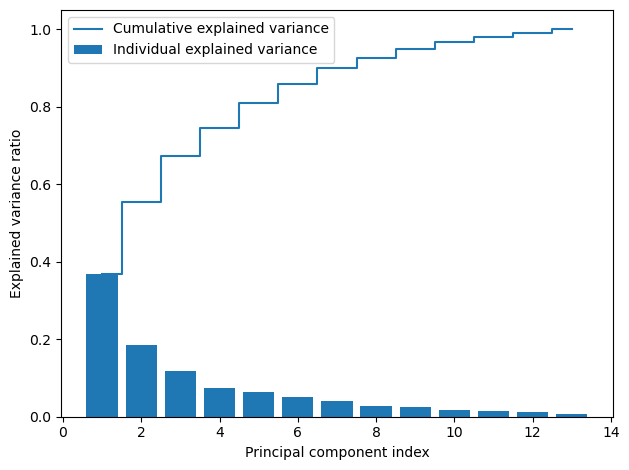

In [6]:
import matplotlib.pyplot as plt


plt.bar(range(1, 14), var_exp, align='center',
        label='Individual explained variance')

plt.step(range(1, 14), cum_var_exp, where='mid',
         label='Cumulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show();

**The resulting plot indicates that the first principal component alone accounts for approximately 40% of the variance. Also, we can see that the first two principal components combined explain almost 60% of the variance in the dataset.**

Although the explained variance plot reminds us of the feature importance values that we computed in Chapter 4, Building Good Training Datasets – Data Preprocessing, via random forests, ***we should remind ourselves that PCA is an unsupervised method, which means that information about the class labels is ignored. Whereas a random forest uses the class membership information to compute the node impurities, variance measures the spread of values along a feature axis.***

## Feature Tranformation

Now, after decomposing the covarince matrix, let's proceed with the **last 3 steps** to transform the Wine dataset onto the new principal component axes. The  last 3 steps are:

   5. Select $k$ eigen-vectors, corresponding to $k$ largest eigen values,<br>where $k$ is the dimensionality of the new feature subspace$(k \leq d)$.

   6. Construct the projection matrix, $\textbf{W}$, from the "top" $k$ eigen-vectors.

   7. Transform the $d$-dimensional input dataset, $\textbf{X}$, using the projection matrix, $\textbf{W}$, to obtain the new $k$-dimensional feature subspace.
    

***Or, in less technical terms, we will sort the eigenpairs by descending order of the eigenvalues, construct a projection matrix from the selected eigenvectors, and use the projection matrix to transform the data onto the lower-dimensional subspace.***

In [7]:
# We start by sorting the eigenpairs by decreasing order of the eigenvalues:

# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key = lambda k: k[0], reverse=True)

In [8]:
# Next, we collect the two eigenvectors that correspond to the two largest 
# eigenvalues, to capture about 60% of the variance in this dataset.

# In practice, the number of principal components has to be determined by a 
# tradeoff between computational efficiency and the performance of the classifier


# eigen_pairs[0][1][:, np.newaxis]

w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))

print('Matrix W:\n', w)

# By executing the code, we have created a 13×2-dimensional
# projection matrix, W, from the top two eigenvectors.

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


Depending on which versions of NumPy and LAPACK you are using, you may obtain the matrix, $\textbf{W}$, with its signs flipped. Please note that this is not an issue; if $\textbf{v}$ is an eigenvector then $\textbf{-v}$ is also an eigenvector.


Using the projection matrix, we can now transform an example, $\textbf{x}$ (represented as a $13$-dimensional row vector), onto the PCA subspace (the principal components one and two) obtaining $\textbf{x}^{′}$, now a two-dimensional example vector consisting of two new features: $$\textbf{x}^{′} = \textbf{xW}$$

In [9]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

Similarly, we can transform the entire $124×13$-dimensional training dataset onto the two principal components by calculating the matrix dot product: $$\textbf{X}^{′} = \textbf{XW}$$

In [10]:
X_train_pca = X_train_std.dot(w)

Lastly, let’s visualize the transformed Wine training dataset, now stored as an $124×2$-dimensional matrix, in a two-dimensional scatterplot:

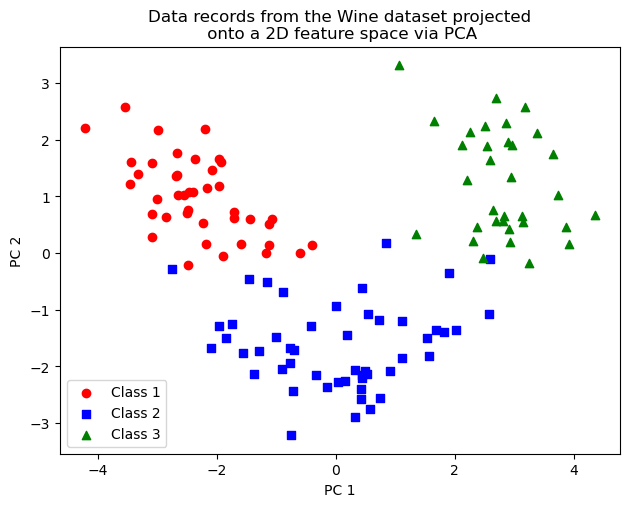

In [11]:
X_train_pca = X_train_std.dot(w)

colors = ['r', 'b', 'g']
markers = ['o', 's', '^']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=f'Class {l}', marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.title(f"Data records from the Wine dataset projected\n onto a 2D feature space via PCA")
# plt.savefig('figures/05_03.png', dpi=300)
plt.show();

***As we can see above, the data is more spread along the first principal component (x axis) than the second principal component (y axis), which is consistent with the explained variance ratio plot that we created in the previous subsection.*** However, we can tell that a linear classifier will likely be able to separate the classes well.


Although we encoded the class label info. for the purpose of illustration in the above scatterplot, ***we have to keep in mind that PCA is an unsupervised technique that doesn't use any class label information.*** 

## PCA in scikit-learn

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_


# Note that we set n_components=None when we initialized the PCA class 
# so that it will return all principal components in a sorted order, 
# instead of performing a dimensionality reduction.

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

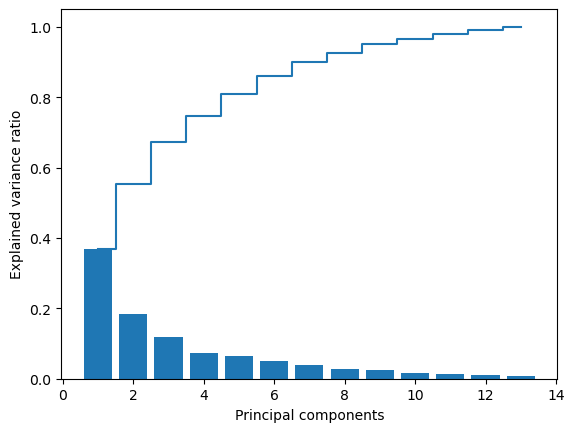

In [13]:
plt.bar(range(1, 14), pca.explained_variance_ratio_, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show();

In [14]:
# Using 2 principal components as above we see the first two principal components
# explain almost 60% of the data

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

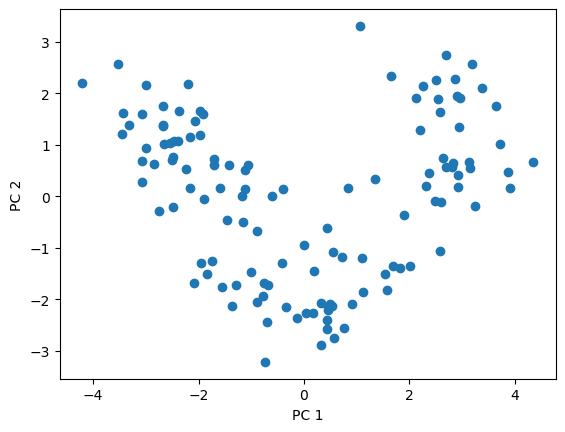

In [15]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show();

Using PCA with Logistic Regression & vizualizing the decision boundary

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# initializing PCA transformer & Logistic Regression estimator
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr', random_state=1,
                        solver='lbfgs')

# dimensionality reduction
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# fitting the LR model on reduced dataset
lr.fit(X_train_pca, y_train)

LogisticRegression(multi_class='ovr', random_state=1)

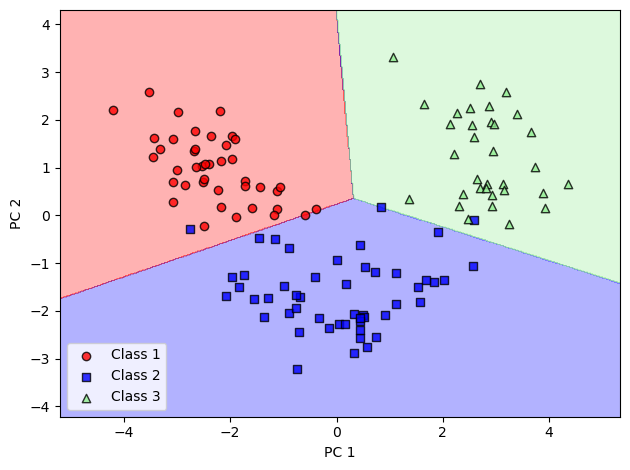

In [17]:
# plotting the decison regions

# plot_decision_regions function to visualize the decision regions

from utils.plot_decision_regions_script import plot_decision_regions


plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('figures/05_04.png', dpi=300)
plt.show();

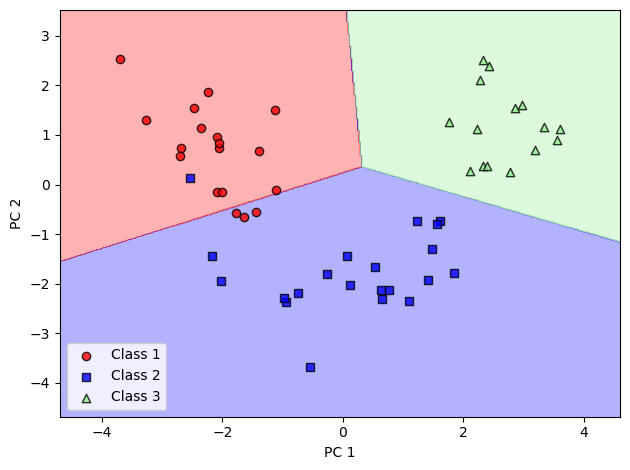

In [18]:
# for the test dataset

plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('figures/05_05.png', dpi=300)
plt.show();

## Assessing feature contributions

***In this section, we will take a brief look at how we can assess the contributions of the original features to the principal components.*** 


As we learned, via PCA, **we create principal components that represent linear combinations of the features.** *Sometimes, we are interested to know about how much each original feature contributes to a given principal component.* **These contributions are often called <u>loadings.</u>** 

$$\text{loadings} = \sqrt{\text{eigenValues}} \times \text{eigenVectors}$$

**The factor loadings can be computed by scaling the eigenvectors by the square root of the eigenvalues.** ***The resulting values can then be interpreted as the correlation between the original features and the principal component.***

To illustrate this, let us plot the loadings for the first principal component. First, we compute the $13×13$-dimensional loadings matrix by multiplying the eigenvectors by the square root of the eigenvalues:

In [19]:
loadings = eigen_vecs*np.sqrt(eigen_vals)

Then, we plot the loadings for the first principal component, ```loadings[:, 0]```, which is the first column in this matrix:

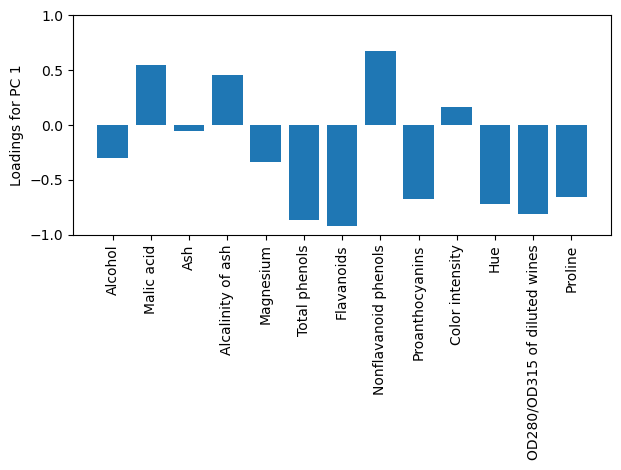

In [20]:
fig, ax = plt.subplots()

ax.bar(range(13), loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)

plt.ylim([-1, 1])
plt.tight_layout()
# plt.savefig('figures/05_05_02.png', dpi=300)
plt.show();

Above, we can see that, for example, Alcohol has a negative correlation with the first principal component (approximately –0.3), whereas Malic acid has a positive correlation (approximately 0.54). Note that a value of 1 describes a perfect positive correlation whereas a value of –1 corresponds to a perfect negative correlation.

In the preceding code example, we compute the factor loadings for our own PCA implementation. We can obtain the loadings from a fitted scikit-learn PCA object in a similar manner, where ```pca.components_``` represents the eigenvectors and ```pca.explained_variance_``` represents the eigenvalues:

In [21]:
loadings[:, 0]

array([-0.3020184 ,  0.54408942, -0.05600938,  0.45540829, -0.33970111,
       -0.8665386 , -0.9184327 ,  0.67279444, -0.67489496,  0.16623657,
       -0.71769524, -0.81117245, -0.65291742])

In [22]:
# sklearn_loadings = eigenVectors * sqrt(eigenValues)

sklearn_loadings = pca.components_.T*np.sqrt(pca.explained_variance_)

To compare the scikit-learn PCA loadings with those we created previously, let us create a similar bar plot:

In [23]:
sklearn_loadings[:,0]

array([-0.3020184 ,  0.54408942, -0.05600938,  0.45540829, -0.33970111,
       -0.8665386 , -0.9184327 ,  0.67279444, -0.67489496,  0.16623657,
       -0.71769524, -0.81117245, -0.65291742])

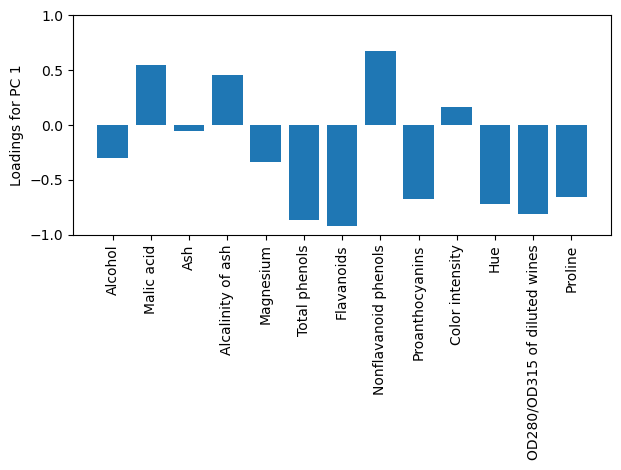

In [24]:
fig, ax = plt.subplots()

ax.bar(range(13), sklearn_loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)

plt.ylim([-1, 1])
plt.tight_layout()
# plt.savefig('figures/05_05_03.png', dpi=300)
plt.show();


# As we can see the bar plots look the same

After exploring PCA as an unsupervised feature extraction technique, the next section will introduce **linear discriminant analysis (LDA)**, ***which is a linear transformation technique that takes class label information into account.***

## Supervised data compression via Linear Discriminant Analysis(LDA)

*LDA can be used as a technique for feature extraction to increase computational efficiency and reduce the degree of overfitting due to the curse of dimensionality in non-regularized models.* 


### PCA v/s LDA

- ***The general concept behind LDA is very similar to PCA, but whereas PCA attempts to find the orthogonal component axes of maximum variance in a dataset, <u>the goal in LDA is to find the feature subspace that optimizes class separability.</u>***

- *Both PCA and LDA are linear transformation techniques that can be used to reduce the number of dimensions in a dataset; the former is an unsupervised algorithm, whereas the latter is supervised.* 

- Thus, we might think that LDA is a superior feature extraction technique for classification tasks compared to PCA. However, A.M. Martinez reported that preprocessing via PCA tends to result in better classification results in an image recognition task in certain cases, for instance, if each class consists of only a small number of examples

--------------------------------------------------------

Figure summarizes the concept of LDA for a two-class problem. Examples from class 1 are shown as circles, and examples from class 2 are shown as crosses:

<table><tr>
<td> <img src="Images/lda.png" alt="Drawing" style="width: 400px;"/> </td>
<td> <img src="Images/lda_1.png" alt="Drawing" style="width: 600px;"/> </td>
</tr></table>


A linear discriminant, as shown on the $x-axis$(LD 1), would separate the two normal distributed classes well. Although the exemplary linear discriminant shown on the $y-axis$(LD 2) captures a lot of the variance in the dataset, it would fail as a good linear discriminant since it does not capture any of the class-discriminatory information. 

--------------------------------------------------------------------------
- **One assumption in LDA is that the data is normally distributed.** 

- **Also, we assume that the classes have identical covariance matrices and that the training examples are statistically independent of each other.** 

- However, even if one, or more, of those assumptions is (slightly) violated, LDA for dimensionality reduction can still work reasonably well

----------------------------------------------------------

###  <a href="https://sebastianraschka.com/Articles/2014_python_lda.html#what-is-a-good-feature-subspace">What is a “good” feature subspace?</a>

## ***Steps to perform LDA***

1. Standardize the $d-dimensional$ dataset($d$ is the # of features).

2. **For each class, compute $d-dimensional$ mean vector.**

3. **Construct the <u>between-class scatter matrix</u>, $\textbf{S}_B$, and the <u>within-class scatter matrix</u>, $\textbf{S}_W$.**

4. **Compute eigen-vectors & their eigen-values of matrix, $\textbf{S}^{-1}_W\textbf{S}_B$.**

5. Sort the eigen-values by decreasing order to rank the corresponding eigen-vecotrs.

6. Choose the $k$ eigen-vectors corresponding to $k$-largest eigen-values to construct a $d \times k$-dimensional transformation matrix, $\textbf{W}$; the eigen-vectors are the columns of this matrix.

7. Project the example onto the new feature subspace using the transformation matrix, $\textbf{W}$. 


***As we can see, LDA is quite similar to PCA*** *in the sense that we are decomposing matrices into eigenvalues and eigenvectors, which will form the new lower-dimensional feature space. However, as mentioned before,* ***LDA takes class label information into account, which is represented in the form of the mean vectors computed in step 2.***

----------------------------------------------------

### Computing the Scatter Matrix

- Since we already standardized the features of the Wine dataset in the PCA, we can proceed with the calculation of the ***mean vectors, which we will use to construct the within-class scatter matrix and between-class scatter matrix, respectively.*** 

- *Each mean vector, $\textbf{m}_i$, stores the mean feature value, $\mu_m$, with respect to the examples of class i:$$\textbf{m}_i = \frac{1}{n_i}\sum_{x\in D_i}\textbf{x}_m$$ This results in three mean vectors, one for each wine class:*
$$\textbf{m}_i = \begin{bmatrix}
\mu_{i,alcohol}\\
\mu_{i,\text{malic acid}}\\
\vdots\\
\mu_{i,proline}
\end{bmatrix}^T\;\;\;\;\; i \in \{1,2,3\}$$

In [25]:
# Calculate the mean vectors for each class:

np.set_printoptions(precision=4)

mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print(f'MV {label}: {mean_vecs[label - 1]}\n')

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



#### Within-class Scatter Matrix

**Using the mean vectors, we can compute the within-class scatter matrix, $\textbf{S}_W$:**

$$\textbf{S}_W = \sum_{i=1}^{c}\textbf{S}_i$$

**This is claculated by summing up the individual scatter matrices, $\textbf{S}_i$, of each individual class i:**

$$\textbf{S}_i = \sum_{x \in D_i}\left(x - m_i\right)\left(x - m_i\right)^T$$

In [26]:
# Compute the within-class scatter matrix:

d = 13 # number of features

S_W = np.zeros((d, d))

for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))  # scatter matrix for each class
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  # make column vectors
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter                          # sum class scatter matrices

print('Within-class scatter matrix: '
      f'{S_W.shape[0]}x{S_W.shape[1]}')

Within-class scatter matrix: 13x13


***The assumption that we are making when we are computing the scatter matrices is that the class labels in the training dataset are uniformly distributed. However, if we print the number of class labels, we see that this assumption is violated:***

In [27]:
# Better: covariance matrix since classes are not equally distributed:

print('Class label distribution:',  
      np.bincount(y_train)[1:])

Class label distribution: [41 50 33]


***Thus, we want to scale the individual scatter matrices, $\textbf{S}_i$, before we sum them up as the scatter matrix, $\textbf{S}_W$. When we divide the scatter matrices by the number of class-examples, $n_i$, we can see that computing the scatter matrix is in fact the same as computing the covariance matrix, $\Sigma_i$ — the covariance matrix is a normalized version of the scatter matrix:***

$$\Sigma_i = \frac{1}{n_i}\textbf{S}_i = \frac{1}{n_i}\sum_{x \in D_i}\left(x - m_i\right)\left(x - m_i\right)^T$$

In [28]:
# computing the scaled within-class scatter matrix

d = 13  # number of features

S_W = np.zeros((d, d))

for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
    
print('Scaled within-class scatter matrix: '
      f'{S_W.shape[0]}x{S_W.shape[1]}')

Scaled within-class scatter matrix: 13x13


#### Between-class Scatter Matrix

After we compute the **scaled within-class scatter matrix (or covariance matrix)**, we can move on to the next step and compute the **between-class scatter matrix** $\textbf{S}_B$: 

$$\textbf{S}_B = \sum_{i=1}^{c}n_i\left(\textbf{m}_i - \textbf{m}\right)\left(\textbf{m}_i - \textbf{m}\right)^T$$

Here, **$m$ is the overall mean that is computed, including examples from all 'c' classes.**

In [29]:
# Compute the between-class scatter matrix:

mean_overall = np.mean(X_train_std, axis=0)
mean_overall = mean_overall.reshape(d, 1)  # make column vector

d = 13  # number of features
S_B = np.zeros((d, d))

for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # make column vector
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Between-class scatter matrix: '
      f'{S_B.shape[0]}x{S_B.shape[1]}')

Between-class scatter matrix: 13x13


### Selecting linear discriminants for the new feature subspace

**Solving the generalized eigenvalue problem for the matrix  $\textbf{S}_W^{-1}\textbf{S}_B$:**


instead of using ```np.linalg.eig()```, we should/can also use ```np.linalg.eigh()```

In [30]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

### Sort eigenvectors in descending order of the eigenvalues:

In [31]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order:

349.6178089059941
172.76152218979394
2.927452713255748e-14
2.927452713255748e-14
1.480381625339196e-14
1.3533650132059972e-14
1.3533650132059972e-14
1.0917306164816297e-14
9.463628713182403e-15
8.596407573242877e-15
4.528090986998065e-15
4.528090986998065e-15
3.533213355930368e-15


**In LDA, the number of linear discriminants is at most $c - 1$, where $c$ is the number of class labels, since the in-between scatter matrix, $\textbf{S}_B$, is the sum of $c$ matrices with rank one or less.** *We can indeed see that we only have two nonzero eigenvalues (the eigenvalues 3-13 are not exactly zero, but this is due to the floating-point arithmetic in NumPy.)* 

------------------------------------------------------------

Collinearity<br> 
Note that in the rare case of perfect collinearity (all aligned example points fall on a straight line), the covariance matrix would have rank one, which would result in only one eigenvector with a nonzero eigenvalue. 

---------------------------------------------------------------

To measure how much of the class-discriminatory information is captured by the linear discriminants (eigenvectors), let’s plot the linear discriminants by decreasing eigenvalues, similar to the explained variance plot that we created in the PCA section. For simplicity, we will call the content of class-discriminatory information **discriminability**:

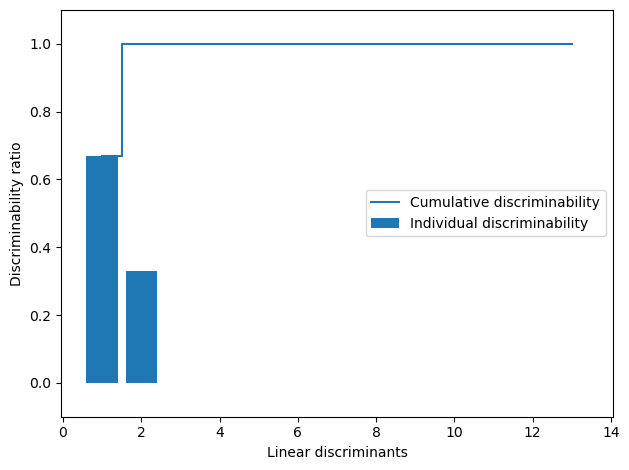

In [32]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 14), discr, align='center',
        label='Individual discriminability')
plt.step(range(1, 14), cum_discr, where='mid',
         label='Cumulative discriminability')
plt.ylabel('Discriminability ratio')
plt.xlabel('Linear discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('figures/05_07.png', dpi=300)
plt.show();

**As we can see, the first 2 linear discriminants alone capture 100% of the useful information in the Wine dataset.**


#### Now, creating the transformation matrix $\textbf{W}$

In [33]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[-0.1481  0.4092]
 [ 0.0908  0.1577]
 [-0.0168  0.3537]
 [ 0.1484 -0.3223]
 [-0.0163  0.0817]
 [ 0.1913 -0.0842]
 [-0.7338 -0.2823]
 [-0.075   0.0102]
 [ 0.0018 -0.0907]
 [ 0.294   0.2152]
 [-0.0328 -0.2747]
 [-0.3547  0.0124]
 [-0.3915  0.5958]]


#### Projecting examples onto the new feature space

$$\textbf{X}^{'} = \textbf{X}\textbf{W}$$

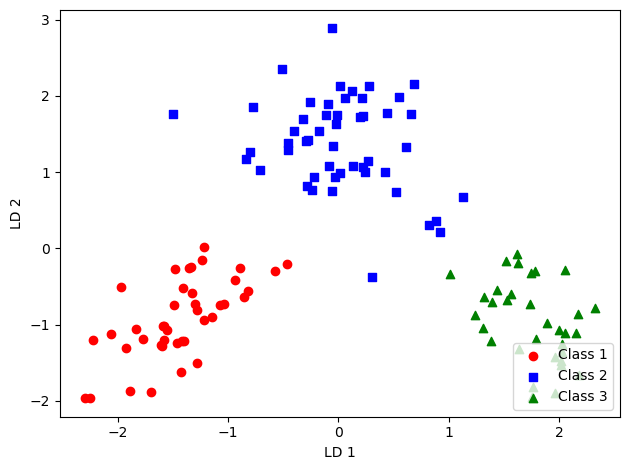

In [34]:
X_train_lda = X_train_std.dot(w)


colors = ['r', 'b', 'g']
markers = ['o', 's', '^']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0],
                X_train_lda[y_train == l, 1] * (-1),
                c=c, label=f'Class {l}', marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.savefig('figures/05_08.png', dpi=300)
plt.show();


# As we can see, the three Wine classes are now perfectly
# linearly separable in the new feature subspace:

## LDA via scikit-learn

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)

X_train_lda = lda.fit_transform(X_train_std, y_train)

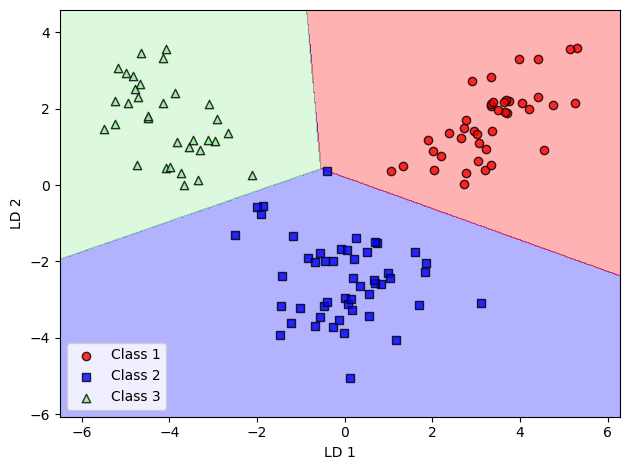

In [36]:
# let’s see how the logistic regression classifier handles the 
# lower-dimensional training dataset after the LDA transformation:

from sklearn.linear_model import LogisticRegression
from utils.plot_decision_regions_script import plot_decision_regions

lr = LogisticRegression(multi_class='ovr', random_state=1,
                        solver='lbfgs')

lr.fit(X_train_lda, y_train)


plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('figures/05_09.png', dpi=300)
plt.show();

Looking at above fig, we can see that the logistic regression model misclassifies one of the examples from class 2. 


By lowering the regularization strength, we could probably shift the decision boundaries so that the logistic regression model classifies all examples in the training dataset correctly. 

However, and more importantly, let’s take a look at the results on the test dataset:

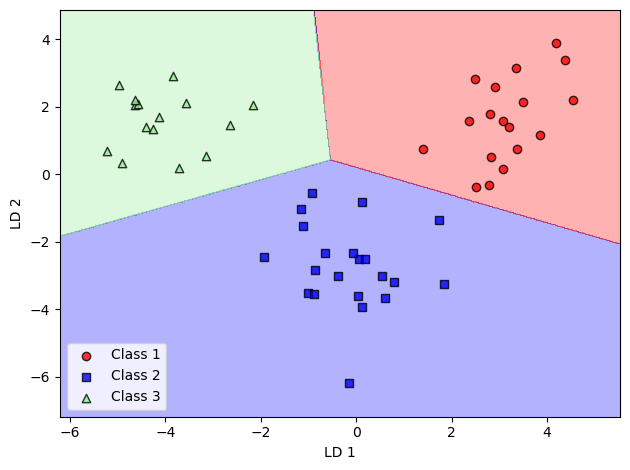

In [37]:
X_test_lda = lda.transform(X_test_std)

plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('figures/05_10.png', dpi=300)
plt.show();

As we can see in above fig, the logistic regression classifier is able to get a perfect accuracy score for classifying the examples in the test dataset by only using a $2-dimensional$ feature subspace, instead of the original 13 Wine features.

## Non-linear Dimensionality Reduction Techniques

### Why comsider nonlinear dimensionality reduction?

The development and application of nonlinear dimensionality reduction techniques is also often referred to as **manifold learning**, where a ***manifold refers to a lower dimensional topological space embedded in a high-dimensional space***. Algorithms for manifold learning have to capture the complicated structure of the data in order to project it onto a lower-dimensional space where the relationship between data points is preserved.


A classic example of manifold learning is the 3D Swiss roll:
<div>
<img src="Images/swiss_roll.png" width="500"/>
</div>

### Visualizing data via ***t-distributed stochastic neighbor embedding(t-SNE)***

t-SNE is often used for visualizing complex datasets in 2 or 3-dimensions. In a nutshell, t-SNE is modeling data points based on their pair-wise distances in the high-dimensional (original) feature space. Then, it finds a probability distribution of pair-wise distances in the new, lower-dimensional space that is close to the probability distribution of pair-wise distances in the original space. Or, in other words, t-SNE learns to embed data points into a lower-dimensional space such that the pairwise distances in the original space are preserved.

However, as the research paper title suggests, t-SNE is a technique intended for visualization purposes as it requires the whole dataset for the projection. Since it projects the points directly (unlike PCA, it does not involve a projection matrix), we cannot apply t-SNE to new data points.

In [39]:
# t-SNE to plot images of handwritten images in 2-D feature space

from sklearn.datasets import load_digits

digits = load_digits()

In [42]:
#Number of Instances: 1797
#Number of Attributes: 64
#Attribute Information: 8x8 image of integer pixels in the range 0..16.

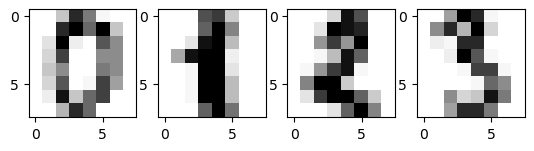

In [44]:
# plotting 4 images

fig, ax = plt.subplots(1, 4)

for i in range(4):
    ax[i].imshow(digits.images[i], cmap='Greys')
    
# plt.savefig('figures/05_12.png', dpi=300)
plt.show();

In [45]:
digits.data.shape

(1797, 64)

In [67]:
# pd.DataFrame(digits.data, columns=digits.feature_names)

y_digits = digits.target    
X_digits = digits.data       # features(pixels)

In [68]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='pca', random_state=123, learning_rate='auto')

X_digits_tsne = tsne.fit_transform(X_digits)

C:\Users\Amit Vikram Raj\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


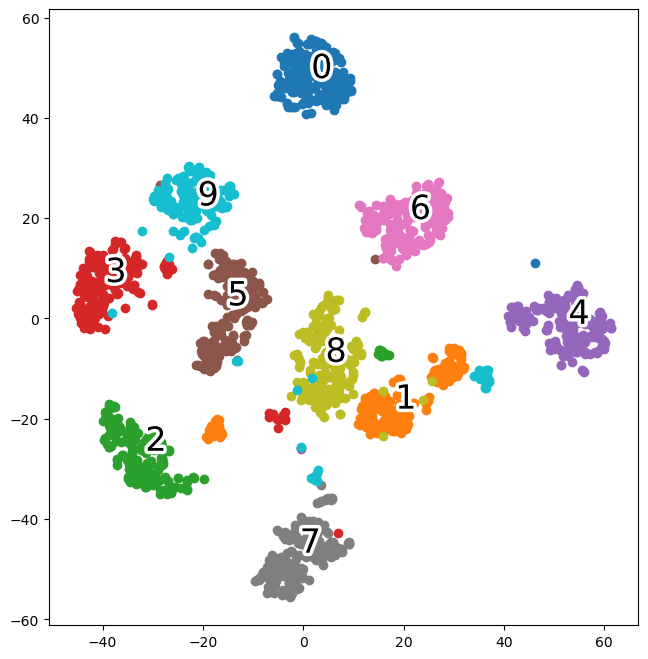

In [69]:
import matplotlib.patheffects as PathEffects


def plot_projection(x, colors):
    
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    for i in range(10):
        plt.scatter(x[colors == i, 0],
                    x[colors == i, 1])

    for i in range(10):

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        
plot_projection(X_digits_tsne, y_digits)
# plt.savefig('figures/05_13.png', dpi=300)
plt.show();

## Summary

- In this chapter, you learned about two fundamental dimensionality reduction techniques for feature extraction: **PCA and LDA**. 

- ***Using PCA, we projected data onto a lower-dimensional subspace to maximize the variance along the orthogonal feature axes, while ignoring the class labels.*** 

- ***LDA, in contrast to PCA, is a technique for supervised dimensionality reduction, which means that it considers class information in the training dataset to attempt to maximize the class separability in a linear feature space.*** 

- Lastly, you also learned about t-SNE, which is a nonlinear feature extraction technique that can be used for visualizing data in 2 or 3-dimensions.


- <a href="https://youtu.be/azXCzI57Yfc">A Great Video on LDA: StatQuest</a>

- <a href="https://youtu.be/_UVHneBUBW0">A Great Video on PCA - 1: StatQuest</a> 

- <a href="https://youtu.be/FgakZw6K1QQ">A Great Video on PCA - 2: StatQuest</a> 

***Reference:***<br>
***Raschka, Sebastian; Liu, Yuxi (Hayden); Mirjalili, Vahid. Machine Learning with PyTorch and Scikit-Learn: Develop machine learning and deep learning models with Python. Packt Publishing.*** 